## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!

# !curl -o /Users/crudele/Downloads/data/data_000637.txt -L https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [3]:
import pandas as pd
import numpy as np

N = 100000
dataset = "/Users/crudele/Downloads/data/data_000637.txt"
data = pd.read_csv(dataset, nrows = N)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
99995,1,0,64,3869201161,2378,29
99996,1,0,70,3869201161,2472,26
99997,1,0,58,3869201161,2558,0
99998,1,0,57,3869201161,2561,23


4\. Create a new column with the absolute difference between ORBIT_CNT and BX_COUNTER

In [4]:
data["difference"] = abs(data["ORBIT_CNT"] - data["BX_COUNTER"])
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,difference
0,1,0,123,3869200167,2374,26,3869197793
1,1,0,124,3869200167,2374,27,3869197793
2,1,0,63,3869200167,2553,28,3869197614
3,1,0,64,3869200167,2558,19,3869197609
4,1,0,64,3869200167,2760,25,3869197407
...,...,...,...,...,...,...,...
99995,1,0,64,3869201161,2378,29,3869198783
99996,1,0,70,3869201161,2472,26,3869198689
99997,1,0,58,3869201161,2558,0,3869198603
99998,1,0,57,3869201161,2561,23,3869198600


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
data['HEAD'] = np.random.randint(2, size = len(data))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,difference
0,0,0,123,3869200167,2374,26,3869197793
1,0,0,124,3869200167,2374,27,3869197793
2,0,0,63,3869200167,2553,28,3869197614
3,1,0,64,3869200167,2558,19,3869197609
4,0,0,64,3869200167,2760,25,3869197407
...,...,...,...,...,...,...,...
99995,0,0,64,3869201161,2378,29,3869198783
99996,1,0,70,3869201161,2472,26,3869198689
99997,1,0,58,3869201161,2558,0,3869198603
99998,1,0,57,3869201161,2561,23,3869198600


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [7]:
data1 = data[data['HEAD'] == 1]
data1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,difference
3,1,0,64,3869200167,2558,19,3869197609
8,1,0,62,3869200167,2774,21,3869197393
10,1,1,7,3869200167,2785,4,3869197382
12,1,1,6,3869200167,2792,18,3869197375
16,1,1,8,3869200167,2787,14,3869197380
...,...,...,...,...,...,...,...
99987,1,1,105,3869201161,2291,26,3869198870
99991,1,1,47,3869201161,2298,7,3869198863
99996,1,0,70,3869201161,2472,26,3869198689
99997,1,0,58,3869201161,2558,0,3869198603


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

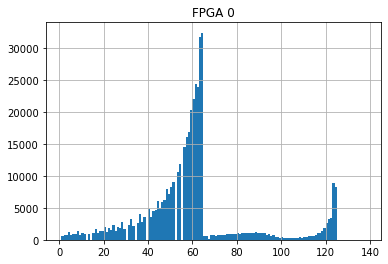

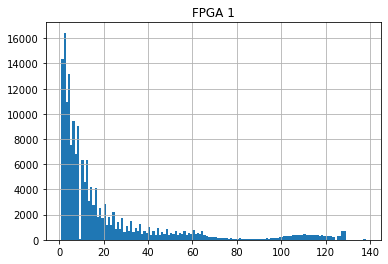

In [8]:
import matplotlib.pyplot as plt

FPGA_0 = data1[data1['FPGA'] == 0]
FPGA_1 = data1[data1['FPGA'] == 1]

TDC_CHANNEL_0 = FPGA_0['TDC_CHANNEL']
TDC_CHANNEL_1 = FPGA_1['TDC_CHANNEL']

TDC_CHANNEL_0.hist(bins=np.arange(TDC_CHANNEL_0.min(), TDC_CHANNEL_0.max()))
plt.title('FPGA 0')
plt.show()
TDC_CHANNEL_1.hist(bins=np.arange(TDC_CHANNEL_1.min(), TDC_CHANNEL_1.max()))
plt.title('FPGA 1')
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [9]:
a = data1.groupby('TDC_CHANNEL').sum()
most_count_1 = a['HEAD'].nlargest(3)
print(most_count_1, '\n')

TDC_CHANNEL
139    54094
64     33172
63     32271
Name: HEAD, dtype: int64 



9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [10]:
unique = data['ORBIT_CNT'].nunique()
print(unique)

l = data[data['TDC_CHANNEL']==139]
unique_139 = l['ORBIT_CNT'].nunique()
print(unique_139)

11001
10976
